Assignment 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Image Augmentation

In [ ]:
data_path = '/content/drive/MyDrive/CNN/flowers'
batch_size = 32
target_size = (64, 64)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode = 'categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical') 

Found 1266 images belonging to 5 classes.
Found 315 images belonging to 5 classes.


Create Model

In [ ]:
model = Sequential()

ADD layers

In [ ]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [ ]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
 31/100 [========>.....................] - ETA: 5:10 - loss: 0.7956 - accuracy: 0.5668

100/100 [==============================] - 140s 1s/step - loss: 0.7956 - accuracy: 0.5668


Save the model

In [ ]:
model.save("model.h5")

Test the model

In [ ]:
def predict():
    img = image.load_img("/content/drive/MyDrive/CNN/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/CNN/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg"))
    plt.axis('off')
    plt.show()

The given image is a daisy


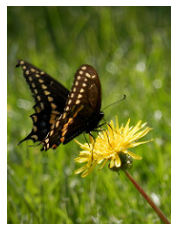

In [ ]:
predict()